30 March 2021 GC, R code to plot beeswarm

In [1]:
library("readxl")
library('data.table')
library("beeswarm")

In [2]:
read_usage <- function(path_in) {
  dt <- read_excel(path_in)
  dt <- dt[ -c(1, 3)]
  names(dt)[2] <- 'BCD'
  names(dt)[3] <- 'CROS'
  dt <- na.omit(dt)
  return(dt)
}

In [3]:
path1 <- '/media/guido/LACIE/Cingle_Guido/Master/Headband/Usage_BCD_CROS.xlsx'

In [4]:
usage <- read_usage(path1)
usage

New names:
* `` -> ...1



Study_ID,BCD,CROS
<dbl>,<dbl>,<dbl>
3,0.4,4.9
4,1.0,2.0
5,1.4,2.3
7,3.2,4.4
8,0.7,13.1
9,4.0,7.6
10,3.7,8.9
11,0.2,12.7
12,0.3,1.1


In [5]:
usage_long <- melt(setDT(usage), id.vars = c('Study_ID'), 
                 value.name = 'Average_Daily_Use', variable.name = 'Device')
usage_long

Study_ID,Device,Average_Daily_Use
<dbl>,<fct>,<dbl>
3,BCD,0.4
4,BCD,1.0
5,BCD,1.4
7,BCD,3.2
8,BCD,0.7
9,BCD,4.0
10,BCD,3.7
11,BCD,0.2
12,BCD,0.3


In [6]:
clm = colnames(usage)
sp = clm[-1]

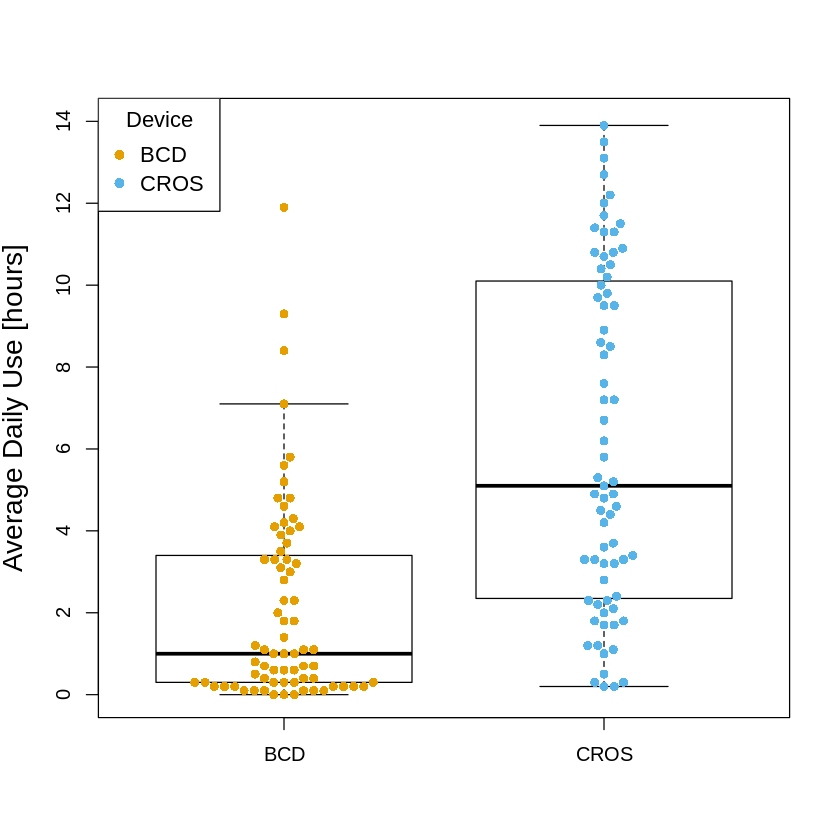

In [7]:
ttl = "Average daily use of BCD versus CROS"
ttl = ""
ColorBlind3  <- c("#E69F00", "#56B4E9", "#009E73")

p <- boxplot(Average_Daily_Use ~ Device, data = usage_long, outline = FALSE, 
             ylab = "Average Daily Use [hours]", 
             xlab = "", cex.lab=1.4, main = ttl, 
             ylim=c(0, 14))
b <- beeswarm(Average_Daily_Use ~ Device, data = usage_long, pch = 16, col = ColorBlind3, add = TRUE)

l <- legend("topleft", legend = sp, title = "Device", pch = 16, col = ColorBlind3, cex = 1.1)

In [8]:
tiff("/home/guido/R/cingle/figures/BCDvsCROS_usage.tiff", units="in", width=7, height=7, res=300)
p <- boxplot(Average_Daily_Use ~ Device, data = usage_long, outline = FALSE, 
             ylab = "Average Daily Use [hours]", 
             xlab = "", cex.lab=1.4, main = ttl, 
             ylim=c(0, 14))
b <- beeswarm(Average_Daily_Use ~ Device, data = usage_long, pch = 16, col = ColorBlind3, add = TRUE)

l <- legend("topleft", legend = sp, title = "Device", pch = 16, col = ColorBlind3, cex = 1.1)
dev.off()

png 
  2